**Preparation and necessary tools**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
from dynamics_toolkit import *
from Lyapunov import *

**Question 1:** Consider 
$$A = \begin{pmatrix} 2 & 0 & 1 \\ 1 & 2 & 0 \\ 0 & 1 & 2 \end{pmatrix}$$

In [3]:
A = np.array([[2, 0, 1], [1, 2, 0], [0, 1, 2]])

and the corresponding replicator equation
$$\dot{x} = x_i ((Ax)_i - x^\top Ax)$$

**Part (a)** Determine the NE and ESS points of this system. Draw the indifference lines, and best response regions in the appropriate triangle $\Delta_3$.

*Solution:* We first note that $A$ is circulant and non-singular. This indicates $(1/3, 1/3, 1/3)$ is a Nash Equlibrium.

In [4]:
Z01 = A[0] - A[1]
Z12 = A[1] - A[2]
Z20 = A[2] - A[0]

print(f"Line Z_01 has equation ({Z01[0]})x_0 + ({Z01[1]})x_1 + ({Z01[2]})x_2 = 0")
print(f"Line Z_12 has equation ({Z12[0]})x_0 + ({Z12[1]})x_1 + ({Z12[2]})x_2 = 0")
print(f"Line Z_20 has equation ({Z20[0]})x_0 + ({Z20[1]})x_1 + ({Z20[2]})x_2 = 0")

Line Z_01 has equation (1)x_0 + (-2)x_1 + (1)x_2 = 0
Line Z_12 has equation (1)x_0 + (1)x_1 + (-2)x_2 = 0
Line Z_20 has equation (-2)x_0 + (1)x_1 + (1)x_2 = 0


It is clear that
- $Z_{01}$ intersects $x_0 = 0$ at $(0,1/3,2/3)$ and $x_2 = 0$ at $(2/3,1/3,0)$
- $Z_{12}$ intersects $x_0 = 0$ at $(0,2/3,1/3)$ and $x_1 = 0$ at $(2/3,0,1/3)$
- $Z_{20}$ intersects $x_1 = 0$ at $(1/3,0,2/3)$ and $x_2 = 0$ at $(1/3,2/3,0)$

In [5]:
Z01 = draw_line([0,1/3,2/3], [2/3,1/3,0], 2)
Z12 = draw_line([0,2/3,1/3], [2/3,0,1/3], 2)
Z20 = draw_line([1/3,0,2/3], [1/3,2/3,0], 2)

Now we can draw the in-difference lines.

In [6]:
PZ01 = proj_3D_simplex(Z01)
PZ12 = proj_3D_simplex(Z12)
PZ20 = proj_3D_simplex(Z20)

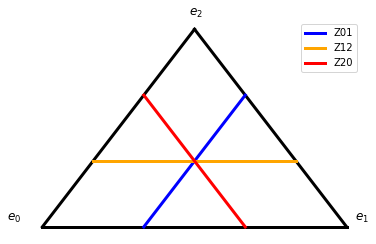

In [9]:
fig, ax = initial_2D_simplex_figure(vertex_label=False)
ax.plot(PZ01[0], PZ01[1], color='blue', linewidth=3, label="Z01")
ax.plot(PZ12[0], PZ12[1], color='orange', linewidth=3, label="Z12")
ax.plot(PZ20[0], PZ20[1], color='red', linewidth=3, label="Z20")
ax.text(-0.8660254-0.2, -0.5 +0.05 , "$e_0$",fontsize=12)
ax.text(+0.8660254+0.05, -0.5 +0.05 , "$e_1$",fontsize=12)
ax.text(0-0.03, 1 +0.1 , "$e_2$",fontsize=12)
ax.legend()

To show the best response

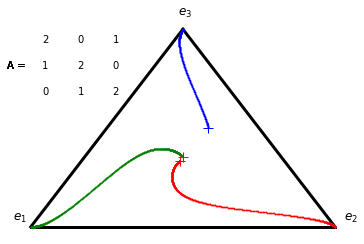

In [37]:
A = np.array([[2,0,1], [1,2,0], [0,1,2]])
my_replicator = oneD_replicator(A)
x01 = np.array([1/3-0.01, 1/3-0.01, 1/3+0.02])
x02 = np.array([1/3+0.01, 1/3-0.01, 1/3])
x03 = np.array([1/6, 1/3, 1/2])

# compute orbits
ts = np.linspace(0,100,10000)
xt1 = odeint(my_replicator.replicator, x01, ts)
xt2 = odeint(my_replicator.replicator, x02, ts)
xt3 = odeint(my_replicator.replicator, x03, ts)

# project the orbits on the triangle
orbittriangle1=proj_3D_simplex(xt1.T)
orbittriangle2=proj_3D_simplex(xt2.T)
orbittriangle3=proj_3D_simplex(xt3.T)
ic1=proj_3D_simplex(x01)
ic2=proj_3D_simplex(x02)
ic3=proj_3D_simplex(x03)

# setup
fig, ax = initial_2D_simplex_figure()

# plot the orbits, the initial values, the corner points, and the boundary points
ax.plot(orbittriangle1[0],orbittriangle1[1],".",markersize=1,color='green')
ax.plot(orbittriangle2[0],orbittriangle2[1],".",markersize=1,color='red')
ax.plot(orbittriangle3[0],orbittriangle3[1],".",markersize=1,color='blue')
ax.plot(ic1[0],ic1[1],"+",markersize=10,color='green')
ax.plot(ic2[0],ic2[1],"+",markersize=10,color='red')
ax.plot(ic3[0],ic3[1],"+",markersize=10,color='blue')

# add the game matrix in the figure
for i in [0,1,2]:
    for j in [0,1,2]:
        c = A[i][j]
        ax.text(0.2*j-0.8, -0.2*i+0.9, str(c))
        ax.text(0.3-1.3,0.7,"A =")
        # plt.text(0-0.03, 1 +0.1 ,A[0,0],A[0,1],A[0,2] ,fontsize=12)

In [13]:
my_replicator.replicator(np.array([2/3,1/3,0]))

array([ 0.,  0., -0.])

In [31]:
jacob = compute_Jacobian(my_replicator.replicator_tensor)
jacob([1/3,1/3,1/3]) * 3, np.linalg.eig(jacob([1/3,1/3,1/3]))

(array([[-1.4901161e-07, -2.0000000e+00, -1.0000001e+00],
        [-1.0000001e+00, -1.4901161e-07, -2.0000000e+00],
        [-2.0000000e+00, -1.0000001e+00, -1.4901161e-07]], dtype=float32),
 (array([-1.0000001 +0.j        ,  0.49999997+0.28867513j,
          0.49999997-0.28867513j], dtype=complex64),
  array([[ 0.57735026+0.j , -0.28867513+0.5j, -0.28867513-0.5j],
         [ 0.57735026+0.j ,  0.57735026+0.j ,  0.57735026-0.j ],
         [ 0.57735026+0.j , -0.28867513-0.5j, -0.28867513+0.5j]],
        dtype=complex64)))

In [32]:
(0.28867513 ** 2) * 6

0.0833333306805169

In [34]:
1/12

0.08333333333333333